In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import chi2_contingency, ttest_ind
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore") 
# medidas de correlacion
from itertools import combinations

In [28]:
url_git="https://raw.githubusercontent.com/s-armeni/proyecto-da-promo-H-modulo-3-team-3-DataMinds/main/hr_data_final.csv"
df_testing=pd.read_csv(r"https://raw.githubusercontent.com/s-armeni/proyecto-da-promo-H-modulo-3-team-3-DataMinds/main/hr_data_final.csv", index_col = 0)

In [29]:
df_testing

,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Employee_number,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work
0,51,No,Unknown,684.0,6.0,3,Unknown,1.0,162,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.00,3,0,11.32,5,3.00,20,15,15,1972,Yes
1,52,No,Unknown,699.0,1.0,4,Life sciences,1.0,259,3,Male,65.0,2,5,Manager,3,Unknown,5678.0,0,Unknown,Unknown,14.0,3.00,1,1,34.00,5,3.00,33,11,9,1971,Yes
2,42,No,Travel_rarely,532.0,4.0,2,Technical degree,1.0,319,3,Male,58.0,3,5,Manager,4,Married,4933.0,1,Unknown,No,11.0,3.00,4,0,22.00,3,2.76,22,11,15,1981,Yes
3,47,No,Travel_rarely,359.0,2.0,4,Medical,1.0,Unknown,1,Female,82.0,3,4,Research director,3,Married,26703.0,3,Yes,Unknown,19.0,3.00,2,2,11.32,2,2.76,20,5,6,1976,No
4,46,No,Unknown,1319.0,3.0,3,Technical degree,1.0,Unknown,1,Female,45.0,4,4,Sales executive,1,Divorced,7739.0,2,Yes,No,12.0,3.00,4,1,11.32,5,3.00,19,2,8,1977,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,Yes,Travel_rarely,530.0,3.0,1,Life sciences,1.0,967,3,Male,51.0,2,3,Sales executive,4,Married,5518.0,1,Yes,Unknown,11.0,3.15,1,1,11.32,6,3.00,16,3,7,1987,No
1610,45,No,Non-travel,805.0,4.0,2,Unknown,1.0,972,3,Male,57.0,3,2,Laboratory technician,2,Unknown,23163.0,1,Unknown,Unknown,12.0,3.00,2,0,11.32,5,2.00,9,0,8,1978,Yes
1611,39,No,Travel_rarely,903.0,13.0,5,Unknown,1.0,Unknown,1,Male,41.0,4,3,Sales executive,3,Single,2560.0,0,Unknown,No,18.0,3.00,4,0,9.00,3,3.00,8,0,7,1984,Yes
1612,36,No,Non-travel,1229.0,8.0,4,Technical degree,1.0,990,1,Male,84.0,3,2,Sales executive,4,Divorced,25952.0,4,Unknown,No,13.0,3.15,4,2,12.00,3,3.00,7,0,7,1987,Unknown


In [31]:
# Analizamos los datos

df_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 0 to 1613
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1614 non-null   int64  
 1   Attrition                   1614 non-null   object 
 2   Business_travel             1614 non-null   object 
 3   Daily_rate                  1614 non-null   float64
 4   Distance_from_home          1614 non-null   float64
 5   Education                   1614 non-null   int64  
 6   Education_field             1614 non-null   object 
 7   Employee_count              1614 non-null   float64
 8   Employee_number             1614 non-null   object 
 9   Environment_satisfaction    1614 non-null   int64  
 10  Gender                      1614 non-null   object 
 11  Hourly_rate                 1614 non-null   float64
 12  Job_involvement             1614 non-null   int64  
 13  Job_level                   1614 

**Crear columna nueva : "Employee_satisfaction"** 

Será el promedio de los índices de satisfacción de nuestra tabla incial: "Environment_satisfaction","Job_satisfaction", "Relationship_satisfaction"


In [30]:
df_testing["Employee_satisfaction"]=df_testing[["Environment_satisfaction","Job_satisfaction", "Relationship_satisfaction"]].mean(axis=1).round(2)

In [7]:
df_testing

,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Employee_number,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work,Employee_satisfaction
0,51,No,Unknown,684.0,6.0,3,Unknown,1.0,162,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.00,3,0,11.32,5,3.00,20,15,15,1972,Yes,2.33
1,52,No,Unknown,699.0,1.0,4,Life sciences,1.0,259,3,Male,65.0,2,5,Manager,3,Unknown,5678.0,0,Unknown,Unknown,14.0,3.00,1,1,34.00,5,3.00,33,11,9,1971,Yes,2.33
2,42,No,Travel_rarely,532.0,4.0,2,Technical degree,1.0,319,3,Male,58.0,3,5,Manager,4,Married,4933.0,1,Unknown,No,11.0,3.00,4,0,22.00,3,2.76,22,11,15,1981,Yes,3.67
3,47,No,Travel_rarely,359.0,2.0,4,Medical,1.0,Unknown,1,Female,82.0,3,4,Research director,3,Married,26703.0,3,Yes,Unknown,19.0,3.00,2,2,11.32,2,2.76,20,5,6,1976,No,2.00
4,46,No,Unknown,1319.0,3.0,3,Technical degree,1.0,Unknown,1,Female,45.0,4,4,Sales executive,1,Divorced,7739.0,2,Yes,No,12.0,3.00,4,1,11.32,5,3.00,19,2,8,1977,No,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,Yes,Travel_rarely,530.0,3.0,1,Life sciences,1.0,967,3,Male,51.0,2,3,Sales executive,4,Married,5518.0,1,Yes,Unknown,11.0,3.15,1,1,11.32,6,3.00,16,3,7,1987,No,2.67
1610,45,No,Non-travel,805.0,4.0,2,Unknown,1.0,972,3,Male,57.0,3,2,Laboratory technician,2,Unknown,23163.0,1,Unknown,Unknown,12.0,3.00,2,0,11.32,5,2.00,9,0,8,1978,Yes,2.33
1611,39,No,Travel_rarely,903.0,13.0,5,Unknown,1.0,Unknown,1,Male,41.0,4,3,Sales executive,3,Single,2560.0,0,Unknown,No,18.0,3.00,4,0,9.00,3,3.00,8,0,7,1984,Yes,2.67
1612,36,No,Non-travel,1229.0,8.0,4,Technical degree,1.0,990,1,Male,84.0,3,2,Sales executive,4,Divorced,25952.0,4,Unknown,No,13.0,3.15,4,2,12.00,3,3.00,7,0,7,1987,Unknown,3.00


**Creamos columnas para los grupos A Y B**

- Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.

- Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.

In [32]:
df_testing['Group_test'] = df_testing['Employee_satisfaction'].apply(lambda x: 'A' if x >= 3 else 'B')

In [8]:
df_testing

,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Employee_number,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work,Employee_satisfaction,Group_test
0,51,No,Unknown,684.0,6.0,3,Unknown,1.0,162,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.00,3,0,11.32,5,3.00,20,15,15,1972,Yes,2.33,B
1,52,No,Unknown,699.0,1.0,4,Life sciences,1.0,259,3,Male,65.0,2,5,Manager,3,Unknown,5678.0,0,Unknown,Unknown,14.0,3.00,1,1,34.00,5,3.00,33,11,9,1971,Yes,2.33,B
2,42,No,Travel_rarely,532.0,4.0,2,Technical degree,1.0,319,3,Male,58.0,3,5,Manager,4,Married,4933.0,1,Unknown,No,11.0,3.00,4,0,22.00,3,2.76,22,11,15,1981,Yes,3.67,A
3,47,No,Travel_rarely,359.0,2.0,4,Medical,1.0,Unknown,1,Female,82.0,3,4,Research director,3,Married,26703.0,3,Yes,Unknown,19.0,3.00,2,2,11.32,2,2.76,20,5,6,1976,No,2.00,B
4,46,No,Unknown,1319.0,3.0,3,Technical degree,1.0,Unknown,1,Female,45.0,4,4,Sales executive,1,Divorced,7739.0,2,Yes,No,12.0,3.00,4,1,11.32,5,3.00,19,2,8,1977,No,2.00,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,Yes,Travel_rarely,530.0,3.0,1,Life sciences,1.0,967,3,Male,51.0,2,3,Sales executive,4,Married,5518.0,1,Yes,Unknown,11.0,3.15,1,1,11.32,6,3.00,16,3,7,1987,No,2.67,B
1610,45,No,Non-travel,805.0,4.0,2,Unknown,1.0,972,3,Male,57.0,3,2,Laboratory technician,2,Unknown,23163.0,1,Unknown,Unknown,12.0,3.00,2,0,11.32,5,2.00,9,0,8,1978,Yes,2.33,B
1611,39,No,Travel_rarely,903.0,13.0,5,Unknown,1.0,Unknown,1,Male,41.0,4,3,Sales executive,3,Single,2560.0,0,Unknown,No,18.0,3.00,4,0,9.00,3,3.00,8,0,7,1984,Yes,2.67,B
1612,36,No,Non-travel,1229.0,8.0,4,Technical degree,1.0,990,1,Male,84.0,3,2,Sales executive,4,Divorced,25952.0,4,Unknown,No,13.0,3.15,4,2,12.00,3,3.00,7,0,7,1987,Unknown,3.00,A


# Análisis Exploratorio de Datos (EDA):

In [8]:
# Comparar entre el grupo A y B, los principales estadísticos los vamos a sacar de cada una de las categorías

def exploratory_data(dataframe, columna_analisis): 

    print(f"La columna {columna_analisis} tiene las siguientes valore únicos:")
    display(pd.DataFrame(dataframe[columna_analisis].value_counts()))    
    

    for categoria in dataframe[columna_analisis].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_analisis] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

In [9]:
exploratory_data(df_testing, "Group_test")

La columna Group_test tiene las siguientes valore únicos:


,Group_test
B,908
A,706



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
Attrition,908,2,No,736
Business_travel,908,4,Unknown,422
Education_field,908,7,Unknown,414
Employee_number,908,602,Unknown,253
Gender,908,2,Male,528
Job_role,908,9,Sales executive,209
Marital_status,908,4,Unknown,386
Over_18,908,2,Unknown,517
Over_time,908,3,No,398
Remote_work,908,3,Yes,361



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
Age,908.0,36.795154,8.973432,18.0,30.00,36.00,42.00,60.00
Daily_rate,908.0,784.770264,392.178194,103.0,469.75,802.09,1111.25,1499.00
Distance_from_home,908.0,10.935022,10.067861,1.0,2.00,8.00,16.00,49.00
Education,908.0,2.970264,1.011618,1.0,2.00,3.00,4.00,5.00
Employee_count,908.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Environment_satisfaction,908.0,2.213656,1.063865,1.0,1.00,2.00,3.00,4.00
Hourly_rate,908.0,67.468183,19.691020,30.0,51.00,67.00,84.00,100.00
Job_involvement,908.0,2.752203,0.714664,1.0,2.00,3.00,3.00,4.00
Job_level,908.0,2.061674,1.089464,1.0,1.00,2.00,3.00,5.00
Job_satisfaction,908.0,2.256608,1.065242,1.0,1.00,2.00,3.00,4.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
Attrition,706,2,No,619
Business_travel,706,4,Unknown,350
Education_field,706,7,Unknown,331
Employee_number,706,481,Unknown,178
Gender,706,2,Male,443
Job_role,706,9,Sales executive,160
Marital_status,706,4,Unknown,265
Over_18,706,2,Unknown,384
Over_time,706,3,Unknown,296
Remote_work,706,3,Yes,294



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
Age,706.0,37.082153,9.268970,18.0,30.00,35.00,43.00,60.0
Daily_rate,706.0,824.355184,380.371440,105.0,531.25,802.09,1152.50,1498.0
Distance_from_home,706.0,11.407932,10.924533,1.0,2.00,8.00,18.00,49.0
Education,706.0,2.866856,1.033814,1.0,2.00,3.00,4.00,5.0
Employee_count,706.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Environment_satisfaction,706.0,3.303116,0.832950,1.0,3.00,4.00,4.00,4.0
Hourly_rate,706.0,64.176218,19.462448,30.0,48.00,66.00,80.00,100.0
Job_involvement,706.0,2.723796,0.707749,1.0,2.00,3.00,3.00,4.0
Job_level,706.0,2.076487,1.117158,1.0,1.00,2.00,3.00,5.0
Job_satisfaction,706.0,3.358357,0.809812,1.0,3.00,4.00,4.00,4.0


Seleccionar columnas que nos interesan para el analisis y crear dataframe nuevo 


In [11]:
df_attrition=df_testing[["Group_test", "Attrition", "Job_satisfaction", "Relationship_satisfaction", "Environment_satisfaction"]]

In [12]:
df_attrition

,Group_test,Attrition,Job_satisfaction,Relationship_satisfaction,Environment_satisfaction
0,B,No,3,3,1
1,B,No,3,1,3
2,A,No,4,4,3
3,B,No,3,2,1
4,B,No,1,4,1
...,...,...,...,...,...
1609,B,Yes,4,1,3
1610,B,No,2,2,3
1611,B,No,3,4,1
1612,A,No,4,4,1


In [13]:
df_attrition.describe().T

,count,mean,std,min,25%,50%,75%,max
Job_satisfaction,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
Relationship_satisfaction,1614.0,2.704461,1.079031,1.0,2.0,3.0,4.0,4.0
Environment_satisfaction,1614.0,2.690211,1.109924,1.0,2.0,3.0,4.0,4.0


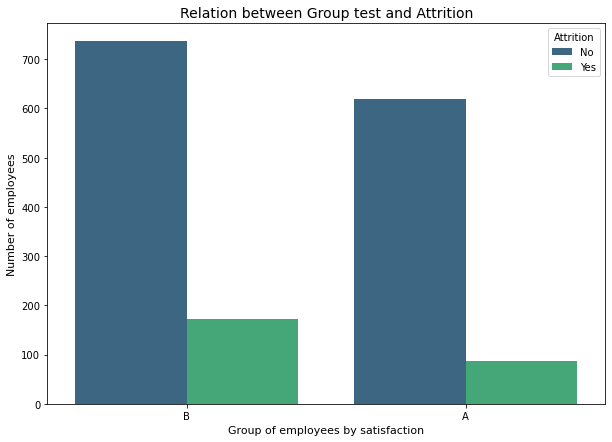

In [58]:
# "Group_test", "Attrition" : visualizamos la distribución de los empleados y la proporcion de la rotacion por cada grupo con un gráfico tipo countplot

plt.figure(figsize=(10, 7)) 
sns.countplot(x = "Group_test", 
              data = df_attrition, 
              palette = "viridis", 
              hue = "Attrition")

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Group of employees by satisfaction", fontsize = 11)
plt.ylabel("Number of employees",  fontsize = 11)

plt.title("Relation between Group test and Attrition" , fontsize = 14);

**Cálculo de la tasa de rotacion**

In [17]:

df_grupoA = df_attrition[df_attrition["Group_test"]== "A"] 

df_grupoB = df_attrition[df_attrition["Group_test"]== "B"]


In [18]:
df_grupoA.groupby("Attrition")["Group_test"].count().reset_index()

,Attrition,Group_test
0,No,619
1,Yes,87


In [19]:
df_grupoB.groupby("Attrition")["Group_test"].count().reset_index()


,Attrition,Group_test
0,No,736
1,Yes,172


In [20]:
tasa_rotacion_a=np.round(df_grupoA[df_grupoA["Attrition"]== "Yes"].shape[0]/df_grupoA.shape[0],2)

print(tasa_rotacion_a)

0.12


In [21]:
tasa_rotacion_b=np.round(df_grupoB[df_grupoB["Attrition"]== "Yes"].shape[0]/df_grupoB.shape[0],2)

print(tasa_rotacion_b)

0.19


- Creo dataframe con los grupos y sus tasas de rotacion correspondiente:

In [22]:

dicc_grupos_rotacion={"Group_test":["A", "B"], "Turnover_rate":[tasa_rotacion_a,tasa_rotacion_b]}

In [23]:
df_grupos_rotacion=pd.DataFrame(dicc_grupos_rotacion)

df_grupos_rotacion

,Group_test,Turnover_rate
0,A,0.12
1,B,0.19


- Visualización de la comparativa entre ambos grupos de su tasa de rotación

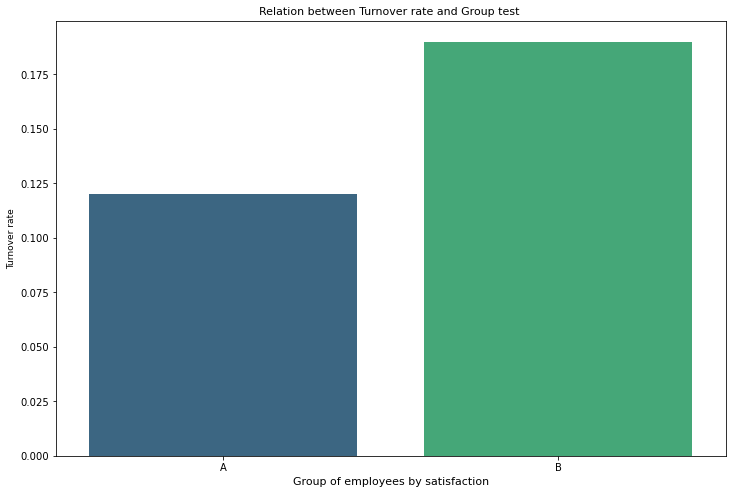

In [53]:
# Comparativa entre los grupos objeto de análisis y la tasa de rotación

plt.figure(figsize=(12, 8)) 
sns.barplot(x = "Group_test", 
            y = "Turnover_rate", 
            data = df_grupos_rotacion,  
            palette = "viridis");

plt.xlabel("Group of employees by satisfaction", fontsize = 11)
plt.ylabel("Turnover rate",  fontsize = 9); 
plt.title("Relation between Turnover rate and Group test " , fontsize = 11);

- Comparativa con los diferentes índices de satisfacción

     *Job satisfaction*

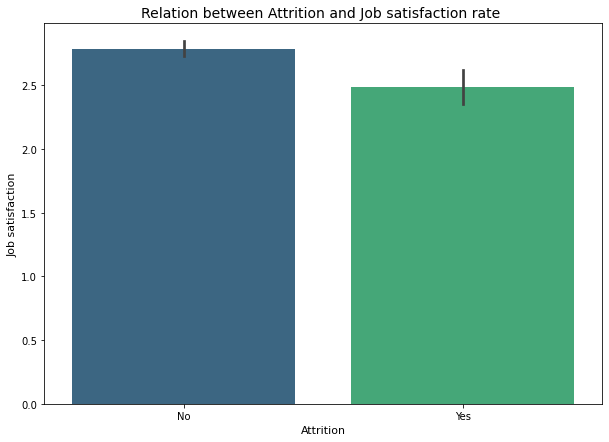

In [54]:
# Comparacion "Attrition" con "Job_satisfaction"

plt.figure(figsize=(10, 7)) 
sns.barplot(x = "Attrition", 
            y = "Job_satisfaction", 
            data = df_attrition, 
            palette = "viridis");

plt.xlabel("Attrition", fontsize = 11)
plt.ylabel("Job satisfaction",  fontsize = 11); 
plt.title("Relation between Attrition and Job satisfaction rate " , fontsize = 14);

In [61]:
df_attrition.groupby("Attrition")["Job_satisfaction"].mean().reset_index()

,Attrition,Job_satisfaction
0,No,2.786716
1,Yes,2.486486


    *Relationship satisfaction*

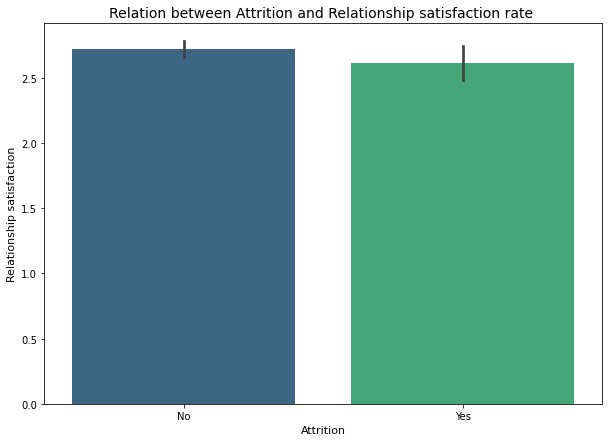

In [55]:
# Comparacion "Attrition" con "Relationship_satisfaction"

plt.figure(figsize=(10, 7))
sns.barplot(x = "Attrition", 
            y = "Relationship_satisfaction", 
            data = df_attrition, 
            palette = "viridis");

plt.xlabel("Attrition", fontsize = 11)
plt.ylabel("Relationship satisfaction",  fontsize = 11); 
plt.title("Relation between Attrition and Relationship satisfaction rate " , fontsize = 14);

In [63]:
df_attrition.groupby("Attrition")["Relationship_satisfaction"].mean().reset_index()

,Attrition,Relationship_satisfaction
0,No,2.721771
1,Yes,2.613900


    *Environment satisfaction*

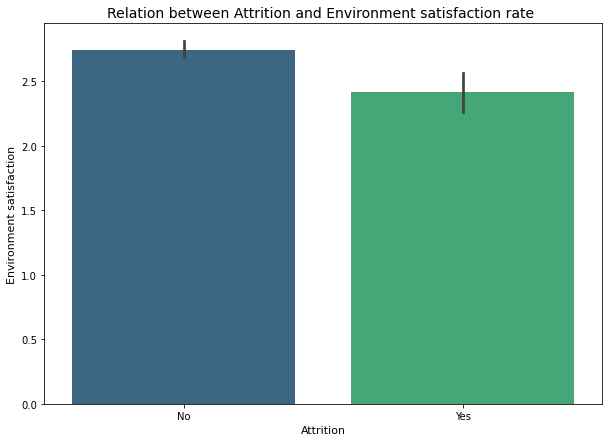

In [67]:
# Comparacion "Attrition" con "Environment_satisfaction"

plt.figure(figsize=(10, 7))
sns.barplot(x = "Attrition", 
            y = "Environment_satisfaction", 
            data = df_attrition, 
            palette = "viridis");

plt.xlabel("Attrition", fontsize = 11)
plt.ylabel("Environment satisfaction",  fontsize = 11); 
plt.title("Relation between Attrition and Environment satisfaction rate " , fontsize = 14);

In [65]:
df_attrition.groupby("Attrition")["Environment_satisfaction"].mean().reset_index()

,Attrition,Environment_satisfaction
0,No,2.742435
1,Yes,2.416988


**Conclusión**

El análisis individual de cada uno de los índices con la relación entre los trabajadores que siguen en la empresa y los que no, no arroja resultados muy determinantes acerca de que haya una causa muy concreta (de entre las opciones analizadas según los índices de que disponemos) del desgaste de los empleados que les lleven a abandonar la empresa. Dado que los promedias del indice *Relationship_satisfaction* son practicamente iguales, podría extraerse la conclusión de que este es el índice de entre los estudiados, que menos relación tiene con la rotación de los empleados.

No obstante, en este punto, se podría profundizar aún más en los datos para lograr encontrar algún patrón con alguna de las variables de las que disponemos en nuestros datos y que procederemos a desarrollar en fases posteriores y que serán plasmadas en un exhaustivo informe.

# Pruebas estadisticas

Realizamos un test estadístico para ver si hay una diferencia significativa en la tasa de rotación entre los grupos A (empleados satisfechos) y B (empleados menos satisfechos). Como Attrition y Gruop test son ambas variables categórica, utilizamos la prueba de Chi-cuadrado para analaizar la correlación entre ellas.



In [33]:
# Recordamos como eran nuestros dataframe filtrados:

df_attrition

,Group_test,Attrition,Job_satisfaction,Relationship_satisfaction,Environment_satisfaction
0,B,No,3,3,1
1,B,No,3,1,3
2,A,No,4,4,3
3,B,No,3,2,1
4,B,No,1,4,1
...,...,...,...,...,...
1609,B,Yes,4,1,3
1610,B,No,2,2,3
1611,B,No,3,4,1
1612,A,No,4,4,1


In [34]:
df_grupos_rotacion

,Group_test,Turnover_rate
0,A,0.12
1,B,0.19


1. Creamos tabla de contigencias para analizar las diferentes combinaciones y sus frecuencias entre ambas variables

In [35]:
# Crear una tabla de contingencia:
contingency_table = pd.crosstab(df_attrition['Group_test'], df_attrition['Attrition'])

In [36]:
contingency_table

Attrition,No,Yes
Group_test,,
A,619,87
B,736,172


2. Se realiza la prueba de Chi-cuadrado

In [37]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [39]:
alpha = 0.05
if p_value < alpha:
    print(f"P_value: {p_value}. There is a significant difference in the turnover rate between Group A (satisfied employees) and Group B (less satisfied employees)")
    print("\n ---------- \n")
    print("""Statistical evidence suggests that employee satisfaction is negatively correlated with turnover in the organization. 
          """)
else:
    print(f"P_value: {p_value}. There is no significant difference between Group A (satisfied employees) and Group B (less satisfied employees) when it comes to employee turnover.")
    print("\n ---------- \n")
    print("""Statistics suggest that average employee satisfaction is not related to company turnover in this case. 
          """) 
    


P_value: 0.0004218788039406464. There is a significant difference in the turnover rate between Group A (satisfied employees) and Group B (less satisfied employees)

 ---------- 

Statistical evidence suggests that employee satisfaction is negatively correlated with turnover in the organization. 
          
